# Summary stats

In [2]:
import glob
import subprocess as sbp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
files = glob.glob('../04_denovo/00_denovo_populations/*_populations_*/*sumstats_summary.tsv', recursive=True)
files

['../04_denovo/00_denovo_populations/grp_populations_50/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/phylo_populations_80/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/grp_populations_95/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/alti_populations_95/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/alti_populations_50/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/alti_populations_80/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/phylo_populations_50/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/grp_populations_80/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/phylo_populations_95/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/grp_populations_90/populations.sumstats_summary.tsv',
 '../04_denovo/00_denovo_populations/alti_populations_90/populations.sumstats_sum

In [4]:
import pandas as pd
import glob

stacks_raw = {}

for file in glob.glob('../04_denovo/00_denovo_populations/*_populations_*/*sumstats_summary.tsv'):
    # Count total lines to get half
    with open(file) as f:
        nlines = sum(1 for _ in f)
    
    # Number of rows to read (exclude header)
    nrows = ((nlines - 1) // 2) -1   # first half of the file after header and minus the last one
    
    # Build the key name
    key = file.replace('../04_denovo/00_denovo_populations/', '') \
              .replace('_populations_', '-denovo-') \
              .replace('/populations.sumstats_summary.tsv', '')
    
    # Read only the first half, skipping the first line (header)
    stacks_raw[key] = pd.read_csv(file, sep='\t', skiprows=1, nrows=nrows)

stacks_raw


{'grp-denovo-50':   # Pop ID  Private  Num_Indv      Var   StdErr        P    Var.1  StdErr.1  \
 0    Preit      210   7.65798  3.42598  0.03261  0.90269  0.02111   0.00256   
 1    Psaxi      116   4.44417  1.78834  0.02358  0.91789  0.02185   0.00261   
 2    Psche      694   7.94287  3.57500  0.03332  0.85361  0.03050   0.00308   
 3    Pteri      609   5.64123  3.53739  0.03326  0.86674  0.02896   0.00301   
 
    Obs_Het    Var.2  ...  StdErr.4  Exp_Hom    Var.5  StdErr.5       Pi  \
 0  0.08802  0.02552  ...   0.00318  0.86651  0.03259   0.00318  0.14363   
 1  0.08302  0.03238  ...   0.00317  0.89295  0.03227   0.00317  0.12228   
 2  0.07261  0.02237  ...   0.00366  0.81106  0.04325   0.00366  0.20245   
 3  0.06114  0.01906  ...   0.00363  0.82690  0.04207   0.00363  0.19139   
 
      Var.6  StdErr.6      Fis    Var.7  StdErr.7  
 0  0.03785   0.00343  0.14577  0.11322   0.03261  
 1  0.04260   0.00364  0.08231  0.08064   0.02358  
 2  0.04969   0.00393  0.28580  0.19162   0

In [5]:
for key, df in stacks_raw.items():
    stacks_raw[key]['group'] = [key]*len(df)

stacks_raw

{'grp-denovo-50':   # Pop ID  Private  Num_Indv      Var   StdErr        P    Var.1  StdErr.1  \
 0    Preit      210   7.65798  3.42598  0.03261  0.90269  0.02111   0.00256   
 1    Psaxi      116   4.44417  1.78834  0.02358  0.91789  0.02185   0.00261   
 2    Psche      694   7.94287  3.57500  0.03332  0.85361  0.03050   0.00308   
 3    Pteri      609   5.64123  3.53739  0.03326  0.86674  0.02896   0.00301   
 
    Obs_Het    Var.2  ...  Exp_Hom    Var.5  StdErr.5       Pi    Var.6  \
 0  0.08802  0.02552  ...  0.86651  0.03259   0.00318  0.14363  0.03785   
 1  0.08302  0.03238  ...  0.89295  0.03227   0.00317  0.12228  0.04260   
 2  0.07261  0.02237  ...  0.81106  0.04325   0.00366  0.20245  0.04969   
 3  0.06114  0.01906  ...  0.82690  0.04207   0.00363  0.19139  0.05174   
 
    StdErr.6      Fis    Var.7  StdErr.7          group  
 0   0.00343  0.14577  0.11322   0.03261  grp-denovo-50  
 1   0.00364  0.08231  0.08064   0.02358  grp-denovo-50  
 2   0.00393  0.28580  0.19162

In [15]:
stacks_total = pd.concat([df for df in stacks_raw.values()],axis=0)[['group','# Pop ID','Private','Obs_Het','Fis','Pi']]
stacks_total[['grp','genome','miss_lvl']] = stacks_total['group'].str.split('-',expand=True)
stacks_total = stacks_total.drop(columns='group')
stacks_total.columns = ['pop','private','obs_het','fis','pi','grp','genome','miss_lvl']
stacks_total["miss_lvl_int"] = [10 if n == 'miss9' else 5 if n == 'miss95' else 20 if n == 'miss8' else 50 for n in list(stacks_total['miss_lvl'])]
stacks_denovo = stacks_total
stacks_denovo

,pop,private,obs_het,fis,pi,grp,genome,miss_lvl,miss_lvl_int
0,Preit,210,0.08802,0.14577,0.14363,grp,denovo,50,50
1,Psaxi,116,0.08302,0.08231,0.12228,grp,denovo,50,50
2,Psche,694,0.07261,0.28580,0.20245,grp,denovo,50,50
3,Pteri,609,0.06114,0.28332,0.19139,grp,denovo,50,50
0,caes,1097,0.09476,0.07252,0.12035,phylo,denovo,80,50
1,duse,728,0.09653,0.09221,0.13869,phylo,denovo,80,50
2,miss,1067,0.10309,0.08471,0.14130,phylo,denovo,80,50
3,para,1000,0.09433,0.13686,0.14411,phylo,denovo,80,50
4,send,533,0.10318,0.06960,0.13583,phylo,denovo,80,50
0,Preit,1,0.03646,0.05682,0.06273,grp,denovo,95,50


In [7]:
stacks_denovo

,pop,private,obs_het,fis,pi,grp,genome,miss_lvl,miss_lvl_int
0,Preit,210,0.08802,0.14577,0.14363,grp,denovo,50,50
1,Psaxi,116,0.08302,0.08231,0.12228,grp,denovo,50,50
2,Psche,694,0.07261,0.28580,0.20245,grp,denovo,50,50
3,Pteri,609,0.06114,0.28332,0.19139,grp,denovo,50,50
0,caes,1097,0.09476,0.07252,0.12035,phylo,denovo,80,50
1,duse,728,0.09653,0.09221,0.13869,phylo,denovo,80,50
2,miss,1067,0.10309,0.08471,0.14130,phylo,denovo,80,50
3,para,1000,0.09433,0.13686,0.14411,phylo,denovo,80,50
4,send,533,0.10318,0.06960,0.13583,phylo,denovo,80,50
0,Preit,1,0.03646,0.05682,0.06273,grp,denovo,95,50


In [16]:
stacks_denovo_90 = stacks_denovo[stacks_denovo["miss_lvl"]== "90"]
stacks_denovo_90 = stacks_denovo_90.drop(columns="miss_lvl_int")
stacks_denovo_90

,pop,private,obs_het,fis,pi,grp,genome,miss_lvl
0,Preit,2,0.06879,0.01784,0.07010,grp,denovo,90
1,Psaxi,3,0.05238,0.16493,0.10830,grp,denovo,90
2,Psche,10,0.05532,0.25698,0.17274,grp,denovo,90
3,Pteri,8,0.04068,0.32764,0.18530,grp,denovo,90
0,north,87,0.20232,0.15434,0.24721,alti,denovo,90
1,south,133,0.19075,0.17982,0.23627,alti,denovo,90
2,west,128,0.17370,0.13826,0.22616,alti,denovo,90
0,caes,518,0.09421,0.06651,0.11667,phylo,denovo,90
1,duse,369,0.09166,0.08908,0.13020,phylo,denovo,90
2,miss,534,0.10207,0.07637,0.13537,phylo,denovo,90


In [9]:
!pwd

/Users/luasoares/DOC/COMPARE/STATS-genome-stats


In [18]:
for file in glob.glob('/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/*-maf5-th100.recode.p.sumstats_summary.tsv'):
    print(file)

/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/grp-41-axi-miss8-maf5-th100.recode.p.sumstats_summary.tsv
/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/phylo-infl-miss9-maf5-th100.recode.p.sumstats_summary.tsv
/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/phylo-axiI-miss8-maf5-th100.recode.p.sumstats_summary.tsv
/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/phylo-nico-miss95-maf5-th100.recode.p.sumstats_summary.tsv
/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/grp-41-hab-miss9-maf5-th100.recode.p.sumstats_summary.tsv
/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/alt-80-sec-miss5-maf5-th100.recode.p.sumstats_summary.tsv
/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/alt-80-axi-miss95-maf5-th100.recode.p.sumstats_summary.tsv
/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/alt-80-aaxi-miss8-maf5-t

In [20]:
stacks_ref = {}
for file in glob.glob('/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/*-maf5-th100.recode.p.sumstats_summary.tsv'):
    with open(file) as rawfile:
        skip = int((len(rawfile.readlines())/2)+1)
        stacks_ref[file.replace('/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW/01_POPULATIONS/01_RESULTS/','').replace('-maf5-th100.recode.p.sumstats_summary.tsv','')] = pd.read_csv(file, sep='\t', skiprows=skip)

stacks_ref

{'grp-41-axi-miss8':   # Pop ID  Private  Sites  Variant_Sites  Polymorphic_Sites  \
 0    Preit      828  10914          10914               5146   
 1    Psaxi      294  10896          10896               3356   
 2    Psche     1959  10914          10914               5559   
 3    Pteri     1934  10908          10908               5200   
 
    %Polymorphic_Loci  Num_Indv      Var   StdErr        P  ...  StdErr.4  \
 0           47.15045   9.35276  2.22266  0.01427  0.90254  ...   0.00167   
 1           30.80029   5.11500  1.33354  0.01106  0.92079  ...   0.00167   
 2           50.93458  10.37218  2.19868  0.01419  0.87617  ...   0.00185   
 3           47.67143   7.35249  2.77837  0.01596  0.87677  ...   0.00187   
 
    Exp_Hom    Var.5  StdErr.5       Pi    Var.6  StdErr.6      Fis    Var.7  \
 0  0.86182  0.03035   0.00167  0.14623  0.03402   0.00177  0.19746  0.12580   
 1  0.89329  0.03025   0.00167  0.11875  0.03758   0.00186  0.09683  0.08138   
 2  0.83357  0.03731   0.0

In [22]:
for key, df in stacks_ref.items():
    stacks_ref[key]['experiment'] = [key]*len(df)

stacks_ref

{'grp-41-axi-miss8':   # Pop ID  Private  Sites  Variant_Sites  Polymorphic_Sites  \
 0    Preit      828  10914          10914               5146   
 1    Psaxi      294  10896          10896               3356   
 2    Psche     1959  10914          10914               5559   
 3    Pteri     1934  10908          10908               5200   
 
    %Polymorphic_Loci  Num_Indv      Var   StdErr        P  ...  Exp_Hom  \
 0           47.15045   9.35276  2.22266  0.01427  0.90254  ...  0.86182   
 1           30.80029   5.11500  1.33354  0.01106  0.92079  ...  0.89329   
 2           50.93458  10.37218  2.19868  0.01419  0.87617  ...  0.83357   
 3           47.67143   7.35249  2.77837  0.01596  0.87677  ...  0.83263   
 
      Var.5  StdErr.5       Pi    Var.6  StdErr.6      Fis    Var.7  StdErr.7  \
 0  0.03035   0.00167  0.14623  0.03402   0.00177  0.19746  0.12580   0.01427   
 1  0.03025   0.00167  0.11875  0.03758   0.00186  0.09683  0.08138   0.01106   
 2  0.03731   0.00185  0.175

In [23]:

stacks_ref = pd.concat([df for df in stacks_ref.values()],axis=0)[['experiment','# Pop ID','Private','Obs_Het','Fis','Pi']]
stacks_ref

,experiment,# Pop ID,Private,Obs_Het,Fis,Pi
0,grp-41-axi-miss8,Preit,828,0.07709,0.19746,0.14623
1,grp-41-axi-miss8,Psaxi,294,0.07514,0.09683,0.11875
2,grp-41-axi-miss8,Psche,1959,0.06356,0.26984,0.17506
3,grp-41-axi-miss8,Pteri,1934,0.05083,0.30756,0.18018
0,phylo-infl-miss9,caes,634,0.07892,0.09799,0.11687
...,...,...,...,...,...,...
4,phylo-secr-miss9,send,340,0.09019,0.09659,0.13494
0,grp-41-sec-miss8,Preit,731,0.07598,0.19754,0.14504
1,grp-41-sec-miss8,Psaxi,276,0.07399,0.09903,0.11855
2,grp-41-sec-miss8,Psche,1852,0.06400,0.27441,0.17749


In [24]:
stacks_ref["experiment"] = stacks_ref["experiment"].replace({
    "axiII": "aaxi",
    "axiI": "axi",
    "infl": "inf",
    "secr": "sec",
    "habro": "hab",
    "-41": "",
    "-80": "",
    "miss":""
}, regex=True)
stacks_ref


,experiment,# Pop ID,Private,Obs_Het,Fis,Pi
0,grp-axi-8,Preit,828,0.07709,0.19746,0.14623
1,grp-axi-8,Psaxi,294,0.07514,0.09683,0.11875
2,grp-axi-8,Psche,1959,0.06356,0.26984,0.17506
3,grp-axi-8,Pteri,1934,0.05083,0.30756,0.18018
0,phylo-inf-9,caes,634,0.07892,0.09799,0.11687
...,...,...,...,...,...,...
4,phylo-sec-9,send,340,0.09019,0.09659,0.13494
0,grp-sec-8,Preit,731,0.07598,0.19754,0.14504
1,grp-sec-8,Psaxi,276,0.07399,0.09903,0.11855
2,grp-sec-8,Psche,1852,0.06400,0.27441,0.17749


In [25]:
stacks_ref[['grp','genome','miss_lvl']] = stacks_ref['experiment'].str.split('-',expand=True)
stacks_ref["miss_lvl"].unique()


array(['8', '9', '95', '5'], dtype=object)

In [26]:
stacks_ref = stacks_ref.drop(columns='experiment')
stacks_ref.columns = ['pop','private','obs_het','fis','pi','grp','genome','miss_lvl']
stacks_ref

,pop,private,obs_het,fis,pi,grp,genome,miss_lvl
0,Preit,828,0.07709,0.19746,0.14623,grp,axi,8
1,Psaxi,294,0.07514,0.09683,0.11875,grp,axi,8
2,Psche,1959,0.06356,0.26984,0.17506,grp,axi,8
3,Pteri,1934,0.05083,0.30756,0.18018,grp,axi,8
0,caes,634,0.07892,0.09799,0.11687,phylo,inf,9
...,...,...,...,...,...,...,...,...
4,send,340,0.09019,0.09659,0.13494,phylo,sec,9
0,Preit,731,0.07598,0.19754,0.14504,grp,sec,8
1,Psaxi,276,0.07399,0.09903,0.11855,grp,sec,8
2,Psche,1852,0.06400,0.27441,0.17749,grp,sec,8


In [27]:
stacks_total = pd.concat([stacks_ref, stacks_denovo])
stacks_total = stacks_total.drop(columns="miss_lvl_int")
stacks_total

,pop,private,obs_het,fis,pi,grp,genome,miss_lvl
0,Preit,828,0.07709,0.19746,0.14623,grp,axi,8
1,Psaxi,294,0.07514,0.09683,0.11875,grp,axi,8
2,Psche,1959,0.06356,0.26984,0.17506,grp,axi,8
3,Pteri,1934,0.05083,0.30756,0.18018,grp,axi,8
0,caes,634,0.07892,0.09799,0.11687,phylo,inf,9
...,...,...,...,...,...,...,...,...
0,caes,518,0.09421,0.06651,0.11667,phylo,denovo,90
1,duse,369,0.09166,0.08908,0.13020,phylo,denovo,90
2,miss,534,0.10207,0.07637,0.13537,phylo,denovo,90
3,para,468,0.08914,0.13505,0.13728,phylo,denovo,90


In [28]:
stacks_total["miss_lvl"] = stacks_total["miss_lvl"].replace({"0":""}, regex=True)
stacks_total

,pop,private,obs_het,fis,pi,grp,genome,miss_lvl
0,Preit,828,0.07709,0.19746,0.14623,grp,axi,8
1,Psaxi,294,0.07514,0.09683,0.11875,grp,axi,8
2,Psche,1959,0.06356,0.26984,0.17506,grp,axi,8
3,Pteri,1934,0.05083,0.30756,0.18018,grp,axi,8
0,caes,634,0.07892,0.09799,0.11687,phylo,inf,9
...,...,...,...,...,...,...,...,...
0,caes,518,0.09421,0.06651,0.11667,phylo,denovo,9
1,duse,369,0.09166,0.08908,0.13020,phylo,denovo,9
2,miss,534,0.10207,0.07637,0.13537,phylo,denovo,9
3,para,468,0.08914,0.13505,0.13728,phylo,denovo,9


In [29]:
stacks_total["miss_lvl"].unique()

array(['8', '9', '95', '5'], dtype=object)

In [30]:
stacks_total["grp"] = stacks_total["grp"].replace({"alti":"alt"})

In [31]:
stacks_total["grp"].unique()

array(['grp', 'phylo', 'alt'], dtype=object)

In [32]:
stacks_miss9 = stacks_total[stacks_total["miss_lvl"] == "9"]
stacks_miss9

,pop,private,obs_het,fis,pi,grp,genome,miss_lvl
0,caes,634,0.07892,0.09799,0.11687,phylo,inf,9
1,duse,470,0.07946,0.12358,0.13630,phylo,inf,9
2,miss,600,0.07494,0.12722,0.13242,phylo,inf,9
3,para,635,0.08547,0.15494,0.14409,phylo,inf,9
4,send,391,0.08831,0.09780,0.13409,phylo,inf,9
...,...,...,...,...,...,...,...,...
0,caes,518,0.09421,0.06651,0.11667,phylo,denovo,9
1,duse,369,0.09166,0.08908,0.13020,phylo,denovo,9
2,miss,534,0.10207,0.07637,0.13537,phylo,denovo,9
3,para,468,0.08914,0.13505,0.13728,phylo,denovo,9


In [33]:
stacks_total.to_csv("Summaries_stats_all_VCF_STACKS.csv", index=False)

In [34]:
stacks_miss9.to_csv("Summaires_stats_miss9_VCF_STACKS.csv", index=False)

In [35]:
stacks_miss9 = stacks_miss9.drop(columns ="miss_lvl")

In [36]:
stacks_miss9.head()

,pop,private,obs_het,fis,pi,grp,genome
0,caes,634,0.07892,0.09799,0.11687,phylo,inf
1,duse,470,0.07946,0.12358,0.13630,phylo,inf
2,miss,600,0.07494,0.12722,0.13242,phylo,inf
3,para,635,0.08547,0.15494,0.14409,phylo,inf
4,send,391,0.08831,0.09780,0.13409,phylo,inf


In [37]:
# Melt the DataFrame to long format
df_long = pd.melt(
    stacks_miss9,
    id_vars=['pop', 'grp', 'genome'],
    value_vars=['private', 'pi', 'obs_het', 'fis'],
    var_name='statistic',
    value_name='value'
)

In [38]:
df_long.head()

,pop,grp,genome,statistic,value
0,caes,phylo,inf,private,634.0
1,duse,phylo,inf,private,470.0
2,miss,phylo,inf,private,600.0
3,para,phylo,inf,private,635.0
4,send,phylo,inf,private,391.0


In [39]:
# Map statistics to LaTeX labels (from previous formatting)
statistic_labels = {
    'pi': r'$\pi$',
    'obs_het': r'$H_{obs}$',
    'private': 'Private Alleles',
    'fis': r'$F_{IS}$'
}

In [40]:
df_long['statistic'] = df_long['statistic'].map(statistic_labels)

In [41]:
df_long.head()

,pop,grp,genome,statistic,value
0,caes,phylo,inf,Private Alleles,634.0
1,duse,phylo,inf,Private Alleles,470.0
2,miss,phylo,inf,Private Alleles,600.0
3,para,phylo,inf,Private Alleles,635.0
4,send,phylo,inf,Private Alleles,391.0


In [42]:
df_long["genome"].unique()

array(['inf', 'hab', 'sec', 'aaxi', 'nico', 'axi', 'denovo'], dtype=object)

In [43]:
# Define custom colors and labels
colors = {
    "P. inflata": "#4792b0",
    "P. axillaris I" : "#dc5646",
    "P. axillaris II": "#8a312b",
    "P. secreta": "#fdc46d",
    "N. sylvestris": "#A05C7B",
    "S. habrochaites" : "#5E9D7E",
    "de novo": "#b3b3b3"
}

genome_labels = {
    "inf" : "P. inflata",
    "axi" : "P. axillaris I",
    "aaxi": "P. axillaris II",
    "sec" : "P. secreta",
    "nico": "N. sylvestris",
    "hab" : "S. habrochaites",
    "denovo": "de novo"
}

group_labels ={
    "alt" : "POP",
    "grp" : "Intra-P4",
    "phylo" : "Inter-C5"
}
  

In [44]:
df_long.head()

,pop,grp,genome,statistic,value
0,caes,phylo,inf,Private Alleles,634.0
1,duse,phylo,inf,Private Alleles,470.0
2,miss,phylo,inf,Private Alleles,600.0
3,para,phylo,inf,Private Alleles,635.0
4,send,phylo,inf,Private Alleles,391.0


In [45]:
df_long['group_label'] = df_long['grp'].map(group_labels)

In [46]:
# Map genome labels in your dataframe
df_long['genome_label'] = df_long['genome'].map(genome_labels)

In [47]:
group_labels

{'alt': 'POP', 'grp': 'Intra-P4', 'phylo': 'Inter-C5'}

/Users/luasoares/DOC/COMPARE/11_ANALYSIS-NEW


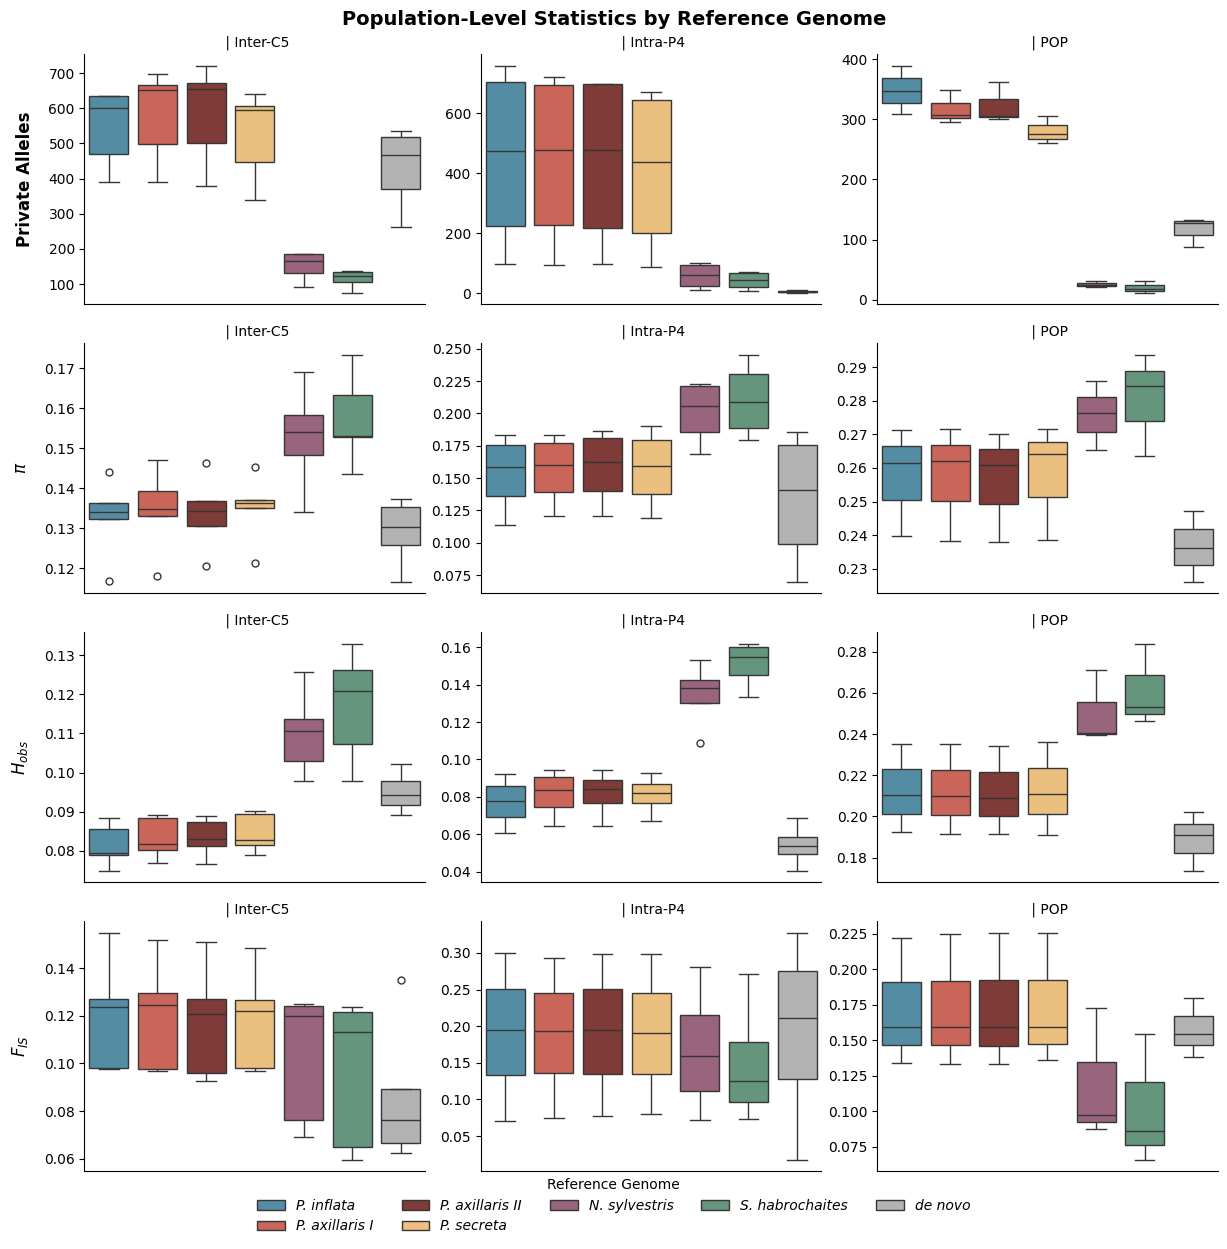

In [ ]:
# Define the order you want
genome_order = ["axi", "aaxi", "inf", "sec", "hab","nico", "denovo"]  # example order
# If genome_label is italicized strings, use that order
genome_label_order = [
                     "P. inflata",
                     "P. axillaris I",
                     "P. axillaris II",
                     "P. secreta",
                     "N. sylvestris",
                     "S. habrochaites",
                     "de novo"]
# Create the faceted boxplots
g = sns.catplot(
    data=df_long,
    x='genome_label',
    y='value',
    hue='genome_label',
    col='group_label',
    row='statistic',
    kind='box',
    palette=colors,
    height=3,
    aspect=1.2,
    sharey=False,
    legend=True, # ✅ Add the legend,
    order=genome_label_order,       # ✅ set x-axis order
    hue_order=genome_label_order    # ✅ set hue order
)

# Adjust titles and labels
g.set_axis_labels("", "Value")  # ✅ Remove x-axis label text
g.set_xticklabels([])           # ✅ Remove x-tick labels

# Remove x-ticks entirely
for ax in g.axes.flat:
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    



# Move row labels to the left side
for ax, row_name in zip(g.axes[:, 0], df_long['statistic'].unique()):
    ax.set_ylabel(row_name, fontsize=12, fontweight='bold', rotation=90, labelpad=10)

# Remove default facet labels on top and add custom group labels
for ax, col_name in zip(g.axes[0, :], df_long['group_label'].unique()):
    ax.set_title(f"Group: {col_name}", fontsize=12, fontweight='bold')

# Remove row facet titles (statistics shown on left)
g.set_titles(col_template="{col_name}", row_template="")

# Adjust layout and legend
g.fig.subplots_adjust(top=0.9, left=0.1, hspace=0.3, wspace=0.2)

# ✅ Move legend outside the plot
g._legend.set_title("Reference Genome")
sns.move_legend(g, "lower center", bbox_to_anchor=(0.5, -0.05), ncol=5, frameon=False)

# Add main title
g.fig.suptitle(
    "Population-Level Statistics by Reference Genome",
    fontsize=14,
    fontweight='bold'
)
# Make legend labels italic
for text in g._legend.texts:
    text.set_fontstyle('italic')

for ax in g.axes.flat:
    for artist in ax.artists:
        artist.set_edgecolor('white')
        artist.set_linewidth(0.5)  # removes box border


plt.tight_layout()
# plt.savefig("Stacks-Result-AllGenom.svg", format="svg", bbox_inches='tight')
# plt.savefig("Stacks-Result-AllGenom.png", format="png", bbox_inches='tight')
plt.show()


# Is it different? Statistics

In [56]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations
from scipy.stats import shapiro, normaltest, anderson, levene, kruskal, f_oneway

In [50]:
# Melt the DataFrame to long format
df_long_stats = pd.melt(
    stacks_miss9,
    id_vars=['pop', 'grp', 'genome'],
    value_vars=['private', 'pi', 'obs_het', 'fis'],
    var_name='statistic',
    value_name='value'
)
df_long_stats


,pop,grp,genome,statistic,value
0,caes,phylo,inf,private,634.00000
1,duse,phylo,inf,private,470.00000
2,miss,phylo,inf,private,600.00000
3,para,phylo,inf,private,635.00000
4,send,phylo,inf,private,391.00000
...,...,...,...,...,...
331,caes,phylo,denovo,fis,0.06651
332,duse,phylo,denovo,fis,0.08908
333,miss,phylo,denovo,fis,0.07637
334,para,phylo,denovo,fis,0.13505


In [55]:
df_long_stats["statistic"].unique()

array(['private', 'pi', 'obs_het', 'fis'], dtype=object)

In [57]:
# 1. Test normality for each statistic-group-genome combination
def test_normality_by_groups(data):
    """
    Test normality using Shapiro-Wilk test for each statistic and group
    """
    results = []
    
    for (stat, grp), group_data in data.groupby(['statistic', 'grp']):
        for genome in group_data['genome'].unique():
            values = group_data[group_data['genome'] == genome]['value'].dropna()
            
            if len(values) >= 3:
                stat_val, p_value = shapiro(values)
                results.append({
                    'statistic': stat,
                    'group': grp,
                    'genome': genome,
                    'n': len(values),
                    'shapiro_stat': stat_val,
                    'p_value': p_value,
                    'normal': 'Yes' if p_value > 0.05 else 'No'
                })
    
    return pd.DataFrame(results)

In [58]:
normality_results = test_normality_by_groups(df_long_stats)
print("=" * 80)
print("NORMALITY TEST RESULTS (Shapiro-Wilk)")
print("=" * 80)
print(normality_results)
print(f"\nSummary:")
print(normality_results.groupby(['statistic', 'group'])['normal'].value_counts())

NORMALITY TEST RESULTS (Shapiro-Wilk)
   statistic  group  genome  n  shapiro_stat   p_value normal
0        fis    alt     sec  3      0.926319  0.474997    Yes
1        fis    alt     hab  3      0.911527  0.423196    Yes
2        fis    alt    nico  3      0.833816  0.198075    Yes
3        fis    alt    aaxi  3      0.939237  0.524315    Yes
4        fis    alt     axi  3      0.943227  0.540518    Yes
..       ...    ...     ... ..           ...       ...    ...
79   private  phylo     axi  5      0.865948  0.250403    Yes
80   private  phylo     hab  5      0.892762  0.371184    Yes
81   private  phylo    nico  5      0.886843  0.341476    Yes
82   private  phylo     sec  5      0.865765  0.249693    Yes
83   private  phylo  denovo  5      0.904624  0.435965    Yes

[84 rows x 7 columns]

Summary:
statistic  group  normal
fis        alt    Yes       7
           grp    Yes       7
           phylo  Yes       6
                  No        1
obs_het    alt    Yes       6
          

In [59]:
normality_results[normality_results["normal"] != "Yes"]

,statistic,group,genome,n,shapiro_stat,p_value,normal
18,fis,phylo,nico,5,0.767764,0.043111,No
23,obs_het,alt,nico,3,0.771662,0.048503,No


In [60]:

# 1. Perform Kruskal-Wallis test for each statistic-group combination
def kruskal_wallis_genome_test(data):
    """
    For each statistic and group, test if values differ across genomes using Kruskal-Wallis
    """
    results = []
    
    for (stat, grp), group_data in data.groupby(['statistic', 'grp']):
        # Get data for each genome
        genomes = group_data['genome'].unique()
        genome_values = []
        valid_genomes = []
        
        for g in genomes:
            values = group_data[group_data['genome'] == g]['value'].dropna().values
            if len(values) >= 2:  # Need at least 2 samples
                genome_values.append(values)
                valid_genomes.append(g)
        
        if len(genome_values) >= 2:  # Need at least 2 groups to compare
            # Kruskal-Wallis test
            h_stat, p_value = kruskal(*genome_values)
            
            results.append({
                'statistic': stat,
                'group': grp,
                'genomes_tested': ', '.join(valid_genomes),
                'n_genomes': len(valid_genomes),
                'H_statistic': h_stat,
                'p_value': p_value,
                'significant': 'Yes' if p_value < 0.05 else 'No'
            })
    
    return pd.DataFrame(results)


In [61]:

# Run Kruskal-Wallis tests
kw_results = kruskal_wallis_genome_test(df_long_stats)
print("=" * 80)
print("KRUSKAL-WALLIS TEST RESULTS")
print("Testing if genomes differ within each statistic-group combination")
print("=" * 80)
print(kw_results)
print("\nSignificant results (p < 0.05):")
print(kw_results[kw_results['significant'] == 'Yes'])

KRUSKAL-WALLIS TEST RESULTS
Testing if genomes differ within each statistic-group combination
   statistic  group                          genomes_tested  n_genomes  \
0        fis    alt  sec, hab, nico, aaxi, axi, inf, denovo          7   
1        fis    grp  hab, sec, inf, axi, nico, aaxi, denovo          7   
2        fis  phylo  inf, aaxi, axi, hab, nico, sec, denovo          7   
3    obs_het    alt  sec, hab, nico, aaxi, axi, inf, denovo          7   
4    obs_het    grp  hab, sec, inf, axi, nico, aaxi, denovo          7   
5    obs_het  phylo  inf, aaxi, axi, hab, nico, sec, denovo          7   
6         pi    alt  sec, hab, nico, aaxi, axi, inf, denovo          7   
7         pi    grp  hab, sec, inf, axi, nico, aaxi, denovo          7   
8         pi  phylo  inf, aaxi, axi, hab, nico, sec, denovo          7   
9    private    alt  sec, hab, nico, aaxi, axi, inf, denovo          7   
10   private    grp  hab, sec, inf, axi, nico, aaxi, denovo          7   
11   private  phyl

In [62]:
non_sig = kw_results[kw_results['significant'] == 'No']
non_sig

,statistic,group,genomes_tested,n_genomes,H_statistic,p_value,significant
0,fis,alt,"sec, hab, nico, aaxi, axi, inf, denovo",7,5.609703,0.468298,No
1,fis,grp,"hab, sec, inf, axi, nico, aaxi, denovo",7,1.300493,0.971631,No
2,fis,phylo,"inf, aaxi, axi, hab, nico, sec, denovo",7,7.260952,0.297387,No
6,pi,alt,"sec, hab, nico, aaxi, axi, inf, denovo",7,10.909091,0.091227,No
7,pi,grp,"hab, sec, inf, axi, nico, aaxi, denovo",7,11.711823,0.068715,No


In [63]:
significant = kw_results[kw_results['significant'] == 'Yes']
significant["p_value"] = round(significant["p_value"], 3)
significant

<positron-console-cell-63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,statistic,group,genomes_tested,n_genomes,H_statistic,p_value,significant
3,obs_het,alt,"sec, hab, nico, aaxi, axi, inf, denovo",7,14.683983,0.023,Yes
4,obs_het,grp,"hab, sec, inf, axi, nico, aaxi, denovo",7,20.475369,0.002,Yes
5,obs_het,phylo,"inf, aaxi, axi, hab, nico, sec, denovo",7,26.593248,0.000,Yes
8,pi,phylo,"inf, aaxi, axi, hab, nico, sec, denovo",7,16.579048,0.011,Yes
9,private,alt,"sec, hab, nico, aaxi, axi, inf, denovo",7,17.711313,0.007,Yes
10,private,grp,"hab, sec, inf, axi, nico, aaxi, denovo",7,19.741717,0.003,Yes
11,private,phylo,"inf, aaxi, axi, hab, nico, sec, denovo",7,23.756190,0.001,Yes


In [64]:
# 2. Post-hoc pairwise Mann-Whitney U tests for significant results
def posthoc_mannwhitney(data, kw_results):
    """
    Perform pairwise Mann-Whitney U comparisons for significant Kruskal-Wallis tests
    """
    results = []
    
    # Only test combinations that were significant
    significant = kw_results[kw_results['significant'] == 'Yes']
    
    for _, row in significant.iterrows():
        stat = row['statistic']
        grp = row['group']
        
        # Get data for this combination
        subset = data[(data['statistic'] == stat) & (data['grp'] == grp)]
        genomes = subset['genome'].unique()
        
        # Pairwise comparisons
        for g1, g2 in combinations(genomes, 2):
            group1 = subset[subset['genome'] == g1]['value'].dropna()
            group2 = subset[subset['genome'] == g2]['value'].dropna()
            
            if len(group1) >= 2 and len(group2) >= 2:
                # Mann-Whitney U test
                u_stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
                
                # Calculate medians and means for reference
                median1 = group1.median()
                median2 = group2.median()
                mean1 = group1.mean()
                mean2 = group2.mean()
                
                results.append({
                    'statistic': stat,
                    'group': grp,
                    'genome1': g1,
                    'genome2': g2,
                    'n1': len(group1),
                    'n2': len(group2),
                    'median1': median1,
                    'median2': median2,
                    'mean1': mean1,
                    'mean2': mean2,
                    'U_statistic': u_stat,
                    'p_value': p_value,
                    'significant': 'Yes' if p_value < 0.05 else 'No'
                })
    
    return pd.DataFrame(results)


In [65]:
# Run post-hoc tests
posthoc_results = posthoc_mannwhitney(df_long_stats, kw_results)
print("\n" + "=" * 80)
print("POST-HOC PAIRWISE COMPARISONS (Mann-Whitney U)")
print("Only for significant Kruskal-Wallis results")
print("=" * 80)
if len(posthoc_results) > 0:
    print(posthoc_results)
    print("\n\nSignificant pairwise differences (p < 0.05):")
    sig_pairs = posthoc_results[posthoc_results['significant'] == 'Yes']
    print(sig_pairs)
else:
    print("No significant Kruskal-Wallis results to follow up")


POST-HOC PAIRWISE COMPARISONS (Mann-Whitney U)
Only for significant Kruskal-Wallis results
    statistic  group genome1 genome2  n1  n2    median1    median2  \
0     obs_het    alt     sec     hab   3   3    0.21109    0.25304   
1     obs_het    alt     sec    nico   3   3    0.21109    0.24032   
2     obs_het    alt     sec    aaxi   3   3    0.21109    0.20871   
3     obs_het    alt     sec     axi   3   3    0.21109    0.21002   
4     obs_het    alt     sec     inf   3   3    0.21109    0.21029   
..        ...    ...     ...     ...  ..  ..        ...        ...   
142   private  phylo     hab     sec   5   5  124.00000  596.00000   
143   private  phylo     hab  denovo   5   5  124.00000  468.00000   
144   private  phylo    nico     sec   5   5  165.00000  596.00000   
145   private  phylo    nico  denovo   5   5  165.00000  468.00000   
146   private  phylo     sec  denovo   5   5  596.00000  468.00000   

          mean1       mean2  U_statistic   p_value significant  
0 

In [ ]:
# Using query method (often more readable)
posthoc_results.query('statistic == "private" and group == "alt"')

,statistic,group,genome1,genome2,n1,n2,median1,median2,mean1,mean2,U_statistic,p_value,significant
105,private,grp,hab,sec,4,4,45.0,437.5,42.00,408.00,0.0,0.028571,Yes
106,private,grp,hab,inf,4,4,45.0,474.5,42.00,451.25,0.0,0.028571,Yes
107,private,grp,hab,axi,4,4,45.0,478.5,42.00,442.25,0.0,0.028571,Yes
108,private,grp,hab,nico,4,4,45.0,61.5,42.00,58.00,5.0,0.485714,No
109,private,grp,hab,aaxi,4,4,45.0,476.5,42.00,436.75,0.0,0.028571,Yes
110,private,grp,hab,denovo,4,4,45.0,5.5,42.00,5.75,14.0,0.114286,No
111,private,grp,sec,inf,4,4,437.5,474.5,408.00,451.25,5.0,0.485714,No
112,private,grp,sec,axi,4,4,437.5,478.5,408.00,442.25,5.0,0.485714,No
113,private,grp,sec,nico,4,4,437.5,61.5,408.00,58.00,14.0,0.114286,No
114,private,grp,sec,aaxi,4,4,437.5,476.5,408.00,436.75,5.0,0.485714,No


In [66]:
# 3. Save results to Excel
with pd.ExcelWriter('kruskal_wallis_results.xlsx') as writer:
    kw_results.to_excel(writer, sheet_name='Kruskal_Wallis', index=False)
    if len(posthoc_results) > 0:
        posthoc_results.to_excel(writer, sheet_name='Pairwise_MannWhitney', index=False)

print("\n" + "=" * 80)
print("Results saved to 'kruskal_wallis_results.xlsx'")
print("=" * 80)


Results saved to 'kruskal_wallis_results.xlsx'


In [67]:
# 4. Print interpretable summary
print("\n" + "=" * 80)
print("SUMMARY")
print("=" * 80)
for grp in df_long_stats['grp'].unique():
    print(f"\n{grp.upper()}:")
    grp_results = kw_results[kw_results['group'] == grp]
    for _, row in grp_results.iterrows():
        sig_text = "DIFFER significantly" if row['significant'] == 'Yes' else "do NOT differ significantly"
        print(f"  - {row['statistic']}: Genomes {sig_text}")
        print(f"    H = {row['H_statistic']:.3f}, p = {row['p_value']:.4f}")
        
        # Show which pairs differ if significant
        if row['significant'] == 'Yes' and len(posthoc_results) > 0:
            pairs = posthoc_results[
                (posthoc_results['statistic'] == row['statistic']) & 
                (posthoc_results['group'] == grp) &
                (posthoc_results['significant'] == 'Yes')
            ]
            if len(pairs) > 0:
                print(f"    Significant pairs:")
                for _, pair in pairs.iterrows():
                    print(f"      • {pair['genome1']} vs {pair['genome2']}: p = {pair['p_value']:.4f}")


SUMMARY

PHYLO:
  - fis: Genomes do NOT differ significantly
    H = 7.261, p = 0.2974
  - obs_het: Genomes DIFFER significantly
    H = 26.593, p = 0.0002
    Significant pairs:
      • inf vs hab: p = 0.0079
      • inf vs nico: p = 0.0079
      • inf vs denovo: p = 0.0079
      • aaxi vs hab: p = 0.0079
      • aaxi vs nico: p = 0.0079
      • aaxi vs denovo: p = 0.0079
      • axi vs hab: p = 0.0079
      • axi vs nico: p = 0.0079
      • axi vs denovo: p = 0.0160
      • hab vs sec: p = 0.0079
      • hab vs denovo: p = 0.0159
      • nico vs sec: p = 0.0079
      • nico vs denovo: p = 0.0159
      • sec vs denovo: p = 0.0317
  - pi: Genomes DIFFER significantly
    H = 16.579, p = 0.0110
    Significant pairs:
      • inf vs hab: p = 0.0159
      • inf vs nico: p = 0.0317
      • aaxi vs hab: p = 0.0159
      • axi vs hab: p = 0.0159
      • hab vs sec: p = 0.0159
      • hab vs denovo: p = 0.0079
      • nico vs denovo: p = 0.0317
  - private: Genomes DIFFER significantly
    H

In [ ]:
# Create a lookup for p-values per facet
kw_lookup = {
    (row['statistic'], row['group']): row['p_value']
    for _, row in kw_results.iterrows()
}

sig_lookup = {
    (row['statistic'], row['group']): row['significant']
    for _, row in kw_results.iterrows()
}


In [ ]:
kw_lookup

{('fis', 'alt'): 0.46829797510183135,
 ('fis', 'grp'): 0.971630531952672,
 ('fis', 'phylo'): 0.2973873071354416,
 ('obs_het', 'alt'): 0.022862283066901485,
 ('obs_het', 'grp'): 0.002278133393249428,
 ('obs_het', 'phylo'): 0.00017254648370926525,
 ('pi', 'alt'): 0.09122705224221656,
 ('pi', 'grp'): 0.06871524719346316,
 ('pi', 'phylo'): 0.010961403940265848,
 ('private', 'alt'): 0.0069956251593491685,
 ('private', 'grp'): 0.0030782073263482756,
 ('private', 'phylo'): 0.000579019060445915}

In [ ]:
genome_order = ["axi", "aaxi", "inf", "sec", "hab", "nico", "denovo"]


In [ ]:
import pandas as pd
import itertools


def generate_significance_letters(posthoc_df, group, statistic, genome_order):
    """
    Assigns significance groups (a, b, c, …) based on pairwise Mann–Whitney U tests.
    """
    subset = posthoc_df[(posthoc_df["group"] == group) & (posthoc_df["statistic"] == statistic)]
    sig_pairs = subset[subset["significant"] == "Yes"][["genome1", "genome2"]].values.tolist()

    # Start with all genomes sharing 'a'
    letters = {g: 'a' for g in genome_order}

    # naive but practical: every time two genomes are significantly different,
    # shift one to the next letter (you can refine manually if needed)
    current_letter = 'a'
    used = {'a': set(genome_order)}
    for g1, g2 in sig_pairs:
        # if they share the same letter, separate them
        for letter, members in used.items():
            if g1 in members and g2 in members:
                # create a new letter group for g2
                new_letter = chr(ord(max(used.keys())) + 1)
                letters[g2] = new_letter
                used[new_letter] = {g2}
                members.remove(g2)
                break

    return pd.DataFrame.from_dict(letters, orient='index', columns=['sig_group']).reset_index().rename(columns={'index':'genome'})


In [72]:
posthoc_results

,statistic,group,genome1,genome2,n1,n2,median1,median2,mean1,mean2,U_statistic,p_value,significant
0,obs_het,alt,sec,hab,3,3,0.21109,0.25304,0.212733,0.261100,0.0,0.100000,No
1,obs_het,alt,sec,nico,3,3,0.21109,0.24032,0.212733,0.250207,0.0,0.100000,No
2,obs_het,alt,sec,aaxi,3,3,0.21109,0.20871,0.212733,0.211383,5.0,1.000000,No
3,obs_het,alt,sec,axi,3,3,0.21109,0.21002,0.212733,0.212180,5.0,1.000000,No
4,obs_het,alt,sec,inf,3,3,0.21109,0.21029,0.212733,0.212710,5.0,1.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,private,phylo,hab,sec,5,5,124.00000,596.00000,115.600000,525.800000,0.0,0.007937,Yes
143,private,phylo,hab,denovo,5,5,124.00000,468.00000,115.600000,430.400000,0.0,0.007937,Yes
144,private,phylo,nico,sec,5,5,165.00000,596.00000,152.600000,525.800000,0.0,0.007937,Yes
145,private,phylo,nico,denovo,5,5,165.00000,468.00000,152.600000,430.400000,0.0,0.007937,Yes


In [73]:
letters_phylo_obshet = generate_significance_letters(posthoc_results, group='phylo', statistic='obs_het', genome_order=genome_order)
print(letters_phylo_obshet)


   genome sig_group
0     axi         a
1    aaxi         a
2     inf         a
3     sec         a
4     hab         b
5    nico         c
6  denovo         d


In [71]:
groups = posthoc_results["group"].unique()
stats = posthoc_results["statistic"].unique()

sig_letters = []
for g, s in itertools.product(groups, stats):
    sig_letters.append(generate_significance_letters(posthoc_results, g, s, genome_order).assign(group=g, statistic=s))

significance_summary = pd.concat(sig_letters)
significance_summary.to_csv("significance_letters_summary.csv", index=False)

significance_summary

,genome,sig_group,group,statistic
0,axi,a,alt,obs_het
1,aaxi,a,alt,obs_het
2,inf,a,alt,obs_het
3,sec,a,alt,obs_het
4,hab,a,alt,obs_het
...,...,...,...,...
2,inf,a,phylo,private
3,sec,a,phylo,private
4,hab,b,phylo,private
5,nico,c,phylo,private


In [79]:
def create_significance_matrix_simple(posthoc_df, statistic, group):
    """Create a significance matrix - simplified version"""
    # Filter for the specific statistic and group
    subset = posthoc_df[
        (posthoc_df['statistic'] == statistic) & 
        (posthoc_df['group'] == group)
    ].copy()
    
    # Get all unique genomes
    genomes = sorted(set(subset['genome1'].unique()) | set(subset['genome2'].unique()))
    
    # Create empty matrices
    matrix = pd.DataFrame(index=genomes, columns=genomes)
    sig_matrix = pd.DataFrame(index=genomes, columns=genomes)
    
    # Initialize with NaN
    for i in genomes:
        for j in genomes:
            matrix.loc[i, j] = np.nan
            sig_matrix.loc[i, j] = np.nan
    
    # Fill matrices
    for _, row in subset.iterrows():
        g1, g2 = row['genome1'], row['genome2']
        matrix.loc[g1, g2] = row['p_value']
        matrix.loc[g2, g1] = row['p_value']
        
        sig_value = 1 if row['significant'] == 'Yes' else 0
        sig_matrix.loc[g1, g2] = sig_value
        sig_matrix.loc[g2, g1] = sig_value
    
    return matrix, sig_matrix

# Try the simplified version
p_matrix, sig_matrix = create_significance_matrix_simple(posthoc_results, 'obs_het', 'phylo')

In [86]:
p_matrix, sig_matrix = create_significance_matrix_simple(posthoc_results, 'private', 'alt')
sig_matrix

,aaxi,axi,denovo,hab,inf,nico,sec
aaxi,NaN,0,0,0,0,0,0
axi,0,NaN,0,0,0,0,0
denovo,0,0,NaN,0,0,0,0
hab,0,0,0,NaN,0,0,0
inf,0,0,0,0,NaN,0,0
nico,0,0,0,0,0,NaN,0
sec,0,0,0,0,0,0,NaN


In [81]:
sig_matrix

,aaxi,axi,denovo,hab,inf,nico,sec
aaxi,NaN,0,1,1,0,1,0
axi,0,NaN,1,1,0,1,0
denovo,1,1,NaN,1,1,1,1
hab,1,1,1,NaN,1,0,1
inf,0,0,1,1,NaN,1,0
nico,1,1,1,0,1,NaN,1
sec,0,0,1,1,0,1,NaN


In [83]:
import pandas as pd
import numpy as np
from itertools import combinations

def assign_significance_groups(posthoc_df, statistic, group):
    """
    Assign significance groups (a, b, c, ...) using compact letter display
    based on pairwise Mann-Whitney U test results
    """
    # Filter for the specific statistic and group
    subset = posthoc_df[
        (posthoc_df['statistic'] == statistic) & 
        (posthoc_df['group'] == group)
    ].copy()
    
    # Get all unique genomes and their median values
    genomes = sorted(set(subset['genome1'].unique()) | set(subset['genome2'].unique()))
    
    # Create a dictionary to store median values for each genome
    genome_medians = {}
    for genome in genomes:
        # Get median from either genome1 or genome2 column
        median1 = subset[subset['genome1'] == genome]['median1'].mean()
        median2 = subset[subset['genome2'] == genome]['median2'].mean()
        # Use the non-zero median (whichever is available)
        genome_medians[genome] = median1 if median1 != 0 else median2
    
    # Sort genomes by their median values (descending)
    genomes_sorted = sorted(genomes, key=lambda x: genome_medians[x], reverse=True)
    
    # Create significance matrix (True = not significantly different)
    sig_matrix = pd.DataFrame(False, index=genomes_sorted, columns=genomes_sorted)
    
    for _, row in subset.iterrows():
        g1, g2 = row['genome1'], row['genome2']
        # If p > 0.05, they are not significantly different
        if row['p_value'] > 0.05 or row['significant'] == 'No':
            sig_matrix.loc[g1, g2] = True
            sig_matrix.loc[g2, g1] = True
    
    # Set diagonal to True (each genome is not different from itself)
    np.fill_diagonal(sig_matrix.values, True)
    
    # Assign groups using the CLD algorithm
    groups = {}
    current_letter = 'a'
    
    for genome in genomes_sorted:
        if genome not in groups:
            groups[genome] = current_letter
            # Find all genomes that are not significantly different from this one
            similar_genomes = sig_matrix.columns[sig_matrix.loc[genome]].tolist()
            for similar in similar_genomes:
                if similar not in groups:
                    groups[similar] = current_letter
            current_letter = chr(ord(current_letter) + 1)
    
    return groups, genome_medians

# Example usage
groups, medians = assign_significance_groups(posthoc_results, 'private', 'phylo')
print("Significance groups:")
for genome, group in sorted(groups.items(), key=lambda x: medians[x[0]], reverse=True):
    print(f"{genome}: {group} (median: {medians[genome]:.3f})")

Significance groups:
aaxi: a (median: 655.000)
axi: a (median: 652.000)
denovo: a (median: nan)
inf: a (median: 600.000)
sec: a (median: 596.000)
nico: b (median: 165.000)
hab: b (median: 124.000)


In [ ]:
groups, medians = assign_significance_groups(posthoc_results, 'private', 'grp')
print("Significance groups:")
for genome, group in sorted(groups.items(), key=lambda x: medians[x[0]], reverse=True):
    print(f"{genome}: {group} (median: {medians[genome]:.3f})")

Significance groups:
axi: a (median: 478.500)
aaxi: a (median: 476.500)
inf: a (median: 474.500)
sec: a (median: 437.500)
nico: a (median: 61.500)
denovo: b (median: nan)
hab: b (median: 45.000)


In [85]:
groups, medians = assign_significance_groups(posthoc_results, 'private', 'alt')
print("Significance groups:")
for genome, group in sorted(groups.items(), key=lambda x: medians[x[0]], reverse=True):
    print(f"{genome}: {group} (median: {medians[genome]:.3f})")

Significance groups:
axi: a (median: 307.000)
denovo: a (median: nan)
inf: a (median: 347.000)
aaxi: a (median: 306.000)
sec: a (median: 275.000)
nico: a (median: 24.000)
hab: a (median: 18.000)


In [93]:
posthoc_results["statistic"].unique()

array(['obs_het', 'pi', 'private'], dtype=object)

In [98]:
groups, medians = assign_significance_groups(posthoc_results, 'obs_het', 'alt')
print("Significance groups:")
for genome, group in sorted(groups.items(), key=lambda x: medians[x[0]], reverse=True):
    print(f"{genome}: {group} (median: {medians[genome]:.3f})")

Significance groups:
denovo: a (median: nan)
hab: a (median: 0.253)
nico: a (median: 0.240)
sec: a (median: 0.211)
inf: a (median: 0.210)
axi: a (median: 0.210)
aaxi: a (median: 0.209)


# STATS - SNPs


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal, mannwhitneyu
from itertools import combinations
from scipy.stats import shapiro, normaltest, anderson, levene, kruskal, f_oneway

In [2]:
snps = pd.read_csv("/Users/luasoares/DOC/COMPARE/02_RefGeno_analysis/00_RESULTADOS/vcf_count_miss9.txt")

In [3]:
snps

,Unnamed: 0,VCF_File,ReferenceGenome,Missing,SNP_Count
0,1,alt80,03_aaxi,miss9,12933
1,2,alt80,02_axi,miss9,12960
2,3,alt80,06_habro,miss9,1285
3,4,alt80,01_infl,miss9,13379
4,5,alt80,05_nico,miss9,1754
5,6,alt80,04_secr,miss9,11875
6,7,grp41,03_aaxi,miss9,3875
7,8,grp41,02_axi,miss9,3894
8,9,grp41,06_habro,miss9,562
9,10,grp41,01_infl,miss9,3867
